# Tugas operasi-operasi dasar
- Nasrul Alfin Prassetyo
- 121140001

# Aras Titik
**Membuat Citra Negatif:**  Pada citra negatif, nilai intensitas piksel dikurangi dari 255.

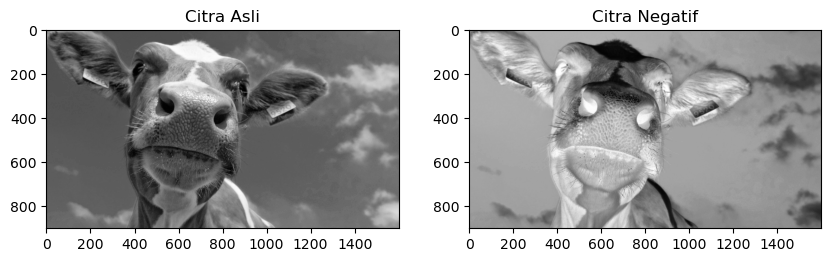

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('R (1).jfif', 0)  # 0 untuk grayscale

# Membuat citra negatif
negative_img = 255 - img

# Tampilkan citra asli dan negatif
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.subplot(1, 2, 2)
plt.imshow(negative_img, cmap='gray')
plt.title('Citra Negatif')
plt.show()


**Pencerahan Citra:**

Untuk pencerahan, kita tambahkan nilai konstanta b ke setiap piksel dan lakukan clipping jika nilainya keluar dari batas intensitas [0, 255].

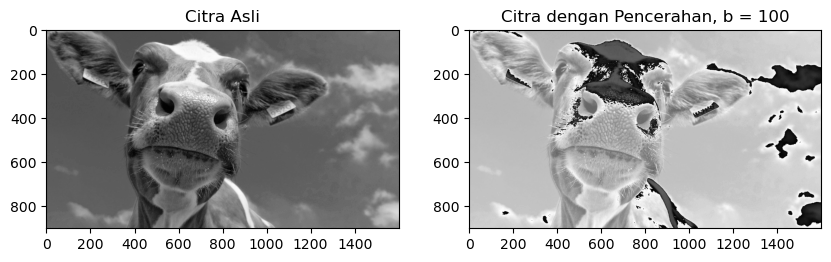

In [8]:
def image_brightening(img, b):
    # Tambahkan nilai b ke setiap piksel
    bright_img = img + b
    # Clipping nilai intensitas agar berada di rentang [0, 255]
    bright_img = np.clip(bright_img, 0, 255)
    return bright_img.astype(np.uint8)

# Pencerahan citra dengan nilai b
b = 100
brightened_img = image_brightening(img, b)

# Tampilkan citra asli dan setelah pencerahan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.subplot(1, 2, 2)
plt.imshow(brightened_img, cmap='gray')
plt.title(f'Citra dengan Pencerahan, b = {b}')
plt.show()


**Konversi Citra Berwarna ke Grayscale:**

  Kita bisa melakukan konversi citra berwarna (RGB) menjadi grayscale dengan dua cara yang disebutkan, yaitu rata-rata kanal RGB atau metode yang mempertimbangkan bobot dari setiap kanal warna.

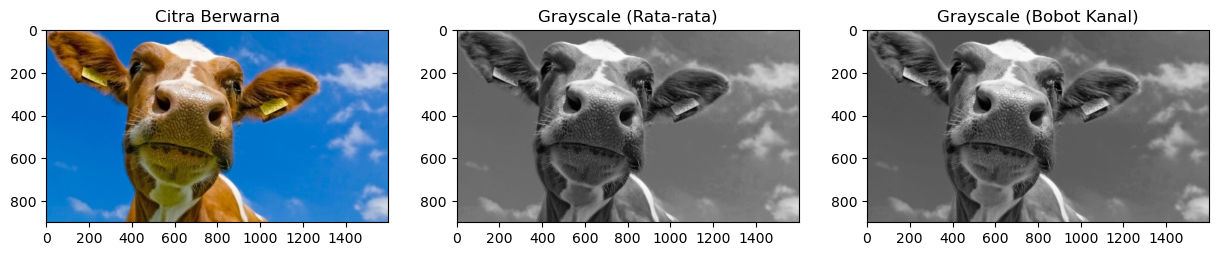

In [14]:
# Baca citra berwarna
color_img = cv2.imread('R (1).jfif')

# Konversi dengan metode (R + G + B) / 3
gray_img_avg = np.mean(color_img, axis=2).astype(np.uint8)

# Konversi dengan metode 0.299R + 0.587G + 0.144B
gray_img_weighted = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.title('Citra Berwarna')
plt.subplot(1, 3, 2)
plt.imshow(gray_img_avg, cmap='gray')
plt.title('Grayscale (Rata-rata)')
plt.subplot(1, 3, 3)
plt.imshow(gray_img_weighted, cmap='gray')
plt.title('Grayscale (Bobot Kanal)')
plt.show()


**Pengambangan (thresholding)**


mengimplementasikan fungsi pengembangan citra biner menggunakan thresholding dalam Python dengan OpenCV. Dalam metode ini, kita akan mengonversi citra grayscale menjadi citra biner berdasarkan nilai ambang tertentu (T).

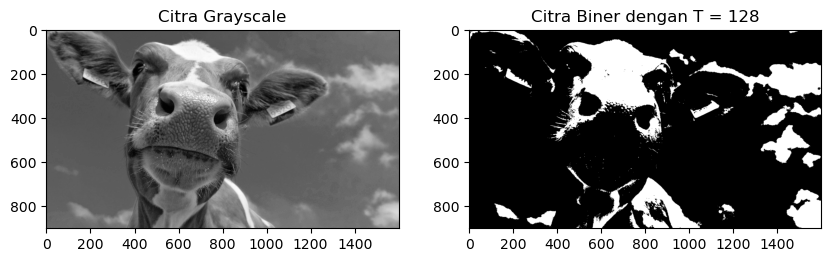

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
img = cv2.imread('R (1).jfif', 0)  # 0 untuk grayscale

def thresholding(img, T):
    M, N = img.shape  # Mendapatkan ukuran citra
    # Membuat citra biner dengan ukuran yang sama
    binary_img = np.zeros((M, N), dtype=np.uint8)

    # Melakukan thresholding
    for i in range(M):
        for j in range(N):
            if img[i][j] < T:
                binary_img[i][j] = 0  # Hitam
            else:
                binary_img[i][j] = 255  # Putih (gunakan 255 untuk biner)

    return binary_img

# Tentukan nilai ambang
T = 128
binary_image = thresholding(img, T)

# Tampilkan citra asli dan citra biner
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Grayscale')
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f'Citra Biner dengan T = {T}')
plt.show()


# Operasi Aritmatika:

**1. Penjumlahan Antar 2 Citra**

Rumus:

$C(x,y)=A(x,y)+B(x,y)C(x,y)=A(x,y)+B(x,y)$

Pada operasi ini, setiap piksel pada citra AA akan dijumlahkan dengan piksel pada citra BB yang memiliki koordinat yang sama. Hasilnya adalah citra baru CC.

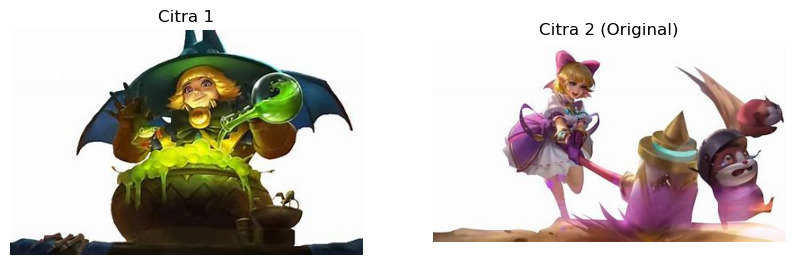

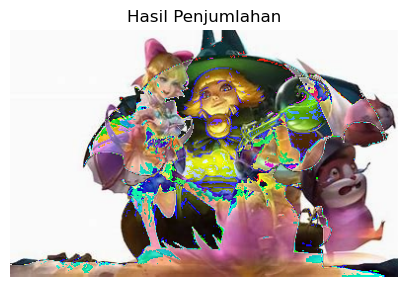

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca dua citra (pastikan kedua citra memiliki ukuran yang sama)
img1 = cv2.imread('image1.jpeg')  # ganti dengan path citramu
img2 = cv2.imread('image2.jpeg')  # ganti dengan path citramu

# Mengubah dari BGR ke RGB agar bisa ditampilkan dengan benar menggunakan matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Menyesuaikan ukuran kedua citra agar sama
height, width = img1.shape[:2]  # mengambil ukuran dari img1
img2_resized = cv2.resize(img2, (width, height))  # menyesuaikan ukuran img2 agar sama dengan img1

# Penjumlahan Antar 2 Citra
# C(x, y) = A(x, y) + B(x, y)
img_add = np.clip(img1 + img2_resized, 0, 255)  # Membatasi hasil antara 0 dan 255

# Mengubah hasil operasi ke RGB untuk ditampilkan dengan matplotlib
img_add_rgb = cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img1_rgb)
plt.title('Citra 1'), plt.axis('off')

plt.subplot(1,2,2), plt.imshow(img2_rgb)
plt.title('Citra 2 (Original)'), plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(img_add_rgb)
plt.title('Hasil Penjumlahan'), plt.axis('off')

plt.show()


**Penjelasan:**
  Setiap piksel pada citr`a A(x,y)A(x,`y) da`n B(x,y)B(x,`y) dijumlahkan. Jika hasilnya melebihi 255, maka dibatasi hingga 255 menggunakan fungs`i np.clip.
    np.clip(img1 + img2, 0, 2`55) memastikan hasil operasi tetap berada dalam rentang 0 hingga 255.

**Pengurangan Antar 2 Citra**

Rumus:

$C(x,y)=A(x,y)−B(x,y)C(x,y)=A(x,y)−B(x,y)$

Pada operasi ini, piksel pada citra AA akan dikurangi dengan piksel pada citra BB. Jika hasil pengurangan kurang dari 0, maka diatur menjadi 0 (karena intensitas citra tidak bisa negatif).

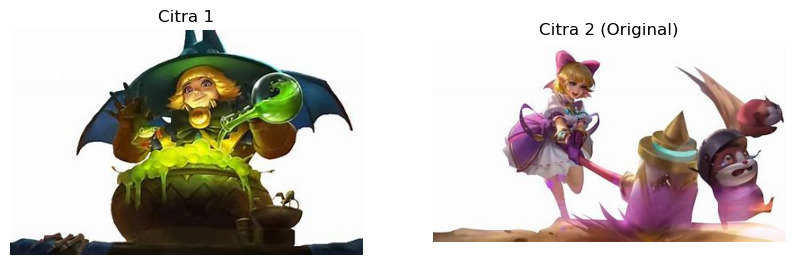

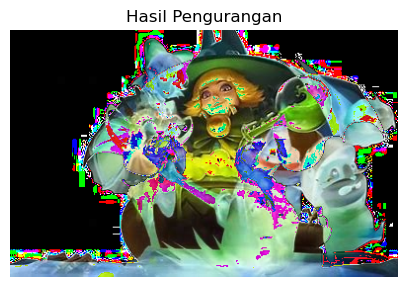

In [26]:
# Pengurangan Antar 2 Citra
# C(x, y) = A(x, y) - B(x, y)
img_subtract = np.clip(img1 - img2_resized, 0, 255)

# Mengubah hasil operasi ke RGB untuk ditampilkan dengan matplotlib
img_subtract_rgb = cv2.cvtColor(img_subtract, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img1_rgb)
plt.title('Citra 1'), plt.axis('off')

plt.subplot(1,2,2), plt.imshow(img2_rgb)
plt.title('Citra 2 (Original)'), plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(img_subtract_rgb)
plt.title('Hasil Pengurangan'), plt.axis('off')

plt.show()


**Penjelasan:**
  Piksel pada citr`a A(x,y)A(x,`y) dikurangi dengan piksel pad`a B(x,y)B(x,y`). Jika hasil pengurangan kurang dari 0, maka hasilnya disetel menjadi 0 menggunakan fungs`i np.cli`p.

**Perkalian Antar 2 Citra**

Rumus:
$C(x,y)=A(x,y)⋅B(x,y)C(x,y)=A(x,y)⋅B(x,y)$

Pada operasi ini, piksel dari citra AA dikalikan dengan piksel dari citra BB pada posisi yang sama. Hasilnya akan memberikan efek intensitas yang lebih besar, terutama jika kedua piksel memiliki nilai besar.besar.

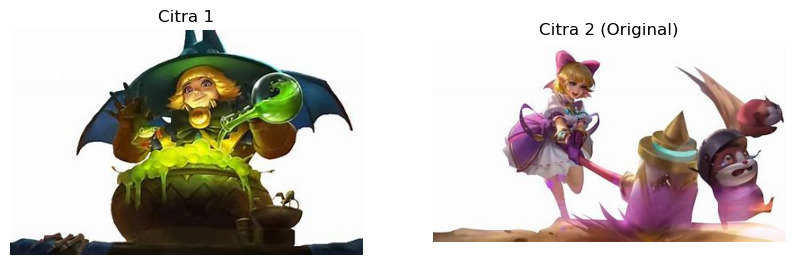

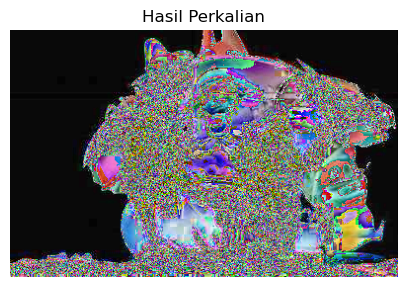

In [35]:
# Perkalian Antar 2 Citra
# C(x, y) = A(x, y) * B(x, y)

# Perkalian dua citra, hasilnya dibagi 255 untuk menormalkan, lalu dikalikan faktor 255 untuk meningkatkan intensitas
img_multiply = img1 * img2_resized / 255.0

# Normalisasi hasil perkalian ke rentang 0-255
img_multiply = cv2.normalize(img_multiply, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Mengubah hasil operasi ke RGB untuk ditampilkan dengan matplotlib
img_multiply_rgb = cv2.cvtColor(img_multiply, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img1_rgb)
plt.title('Citra 1'), plt.axis('off')

plt.subplot(1,2,2), plt.imshow(img2_rgb)
plt.title('Citra 2 (Original)'), plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(img_multiply_rgb)
plt.title('Hasil Perkalian'), plt.axis('off')

plt.show()


**Penjelasan:**

Piksel dari citra `A(x,y)A(x,y)` dikalikan dengan piksel dari `B(x,y)B(x,y)`. Karena hasil perkalian bisa melebihi 255, kita membagi hasilnya dengan 255.0 untuk menormalkan kembali intensitasnya.
    Hasil operasi kemudian diubah menjadi tipe data uint8 agar sesuai dengan format citra.

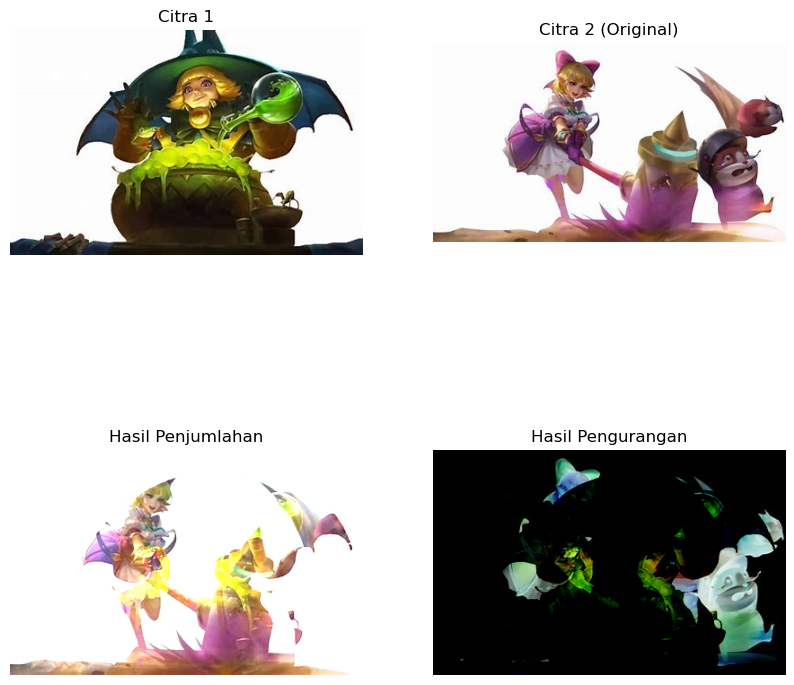

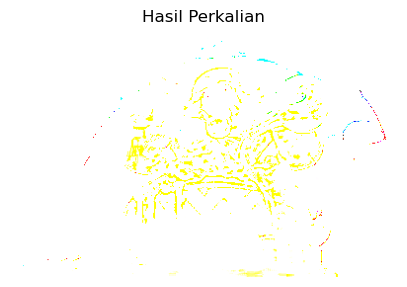

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca dua citra
img1 = cv2.imread('image1.jpeg')  # ganti dengan path citramu
img2 = cv2.imread('image2.jpeg')  # ganti dengan path citramu

# Mengubah dari BGR ke RGB agar bisa ditampilkan dengan benar menggunakan matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Menyesuaikan ukuran citra kedua agar sama dengan citra pertama
height, width = img1.shape[:2]
img2_resized = cv2.resize(img2, (width, height))

# Penjumlahan Antar 2 Citra
img_add = cv2.add(img1, img2_resized)

# Pengurangan Antar 2 Citra
img_subtract = cv2.subtract(img1, img2_resized)

# Perkalian Antar 2 Citra
img_multiply = cv2.multiply(img1, img2_resized)

# Mengubah hasil operasi ke RGB untuk ditampilkan dengan matplotlib
img_add_rgb = cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB)
img_subtract_rgb = cv2.cvtColor(img_subtract, cv2.COLOR_BGR2RGB)
img_multiply_rgb = cv2.cvtColor(img_multiply, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(10,10))

plt.subplot(2,2,1), plt.imshow(img1_rgb)
plt.title('Citra 1'), plt.axis('off')

plt.subplot(2,2,2), plt.imshow(img2_rgb)
plt.title('Citra 2 (Original)'), plt.axis('off')

plt.subplot(2,2,3), plt.imshow(img_add_rgb)
plt.title('Hasil Penjumlahan'), plt.axis('off')

plt.subplot(2,2,4), plt.imshow(img_subtract_rgb)
plt.title('Hasil Pengurangan'), plt.axis('off')

plt.figure(figsize=(5,5))
plt.imshow(img_multiply_rgb)
plt.title('Hasil Perkalian'), plt.axis('off')

plt.show()


# Implementasi Operasi AND dan OR pada Citra

**Operasi AND**

Operasi AND pada dua citra menghasilkan citra baru di mana piksel hasilnya adalah AND bitwise dari piksel-piksel pada kedua citra input. Dengan kata lain, operasi AND hanya menghasilkan nilai 1 jika kedua piksel input bernilai 1, dan 0 sebaliknya.

Rumus:

$C(x,y)=A(x,y)∧B(x,y)$
$C(x,y)=A(x,y)∧B(x,y)$

Di mana:

`A(x,y)A(x,y) adalah nilai piksel pada citra pertama.`

`B(x,y)B(x,y) adalah nilai piksel pada citra kedua.`

`C(x,y)C(x,y) adalah citra hasil.`

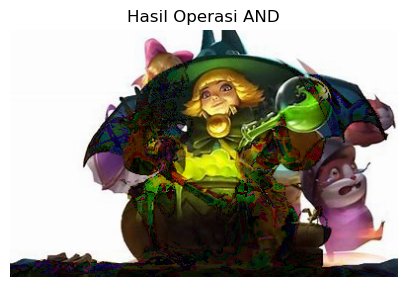

In [54]:
import cv2
import matplotlib.pyplot as plt

# Membaca dua citra
img1 = cv2.imread('image1.jpeg')  # ganti dengan path citramu
img2 = cv2.imread('image2.jpeg')  # ganti dengan path citramu

# Menyesuaikan ukuran citra kedua agar sama dengan citra pertama
height, width = img1.shape[:2]
img2_resized = cv2.resize(img2, (width, height))

# Operasi AND bitwise
img_and = cv2.bitwise_and(img1, img2_resized)

# Mengubah dari BGR ke RGB agar bisa ditampilkan dengan benar menggunakan matplotlib
img_and_rgb = cv2.cvtColor(img_and, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(5,5))
plt.imshow(img_and_rgb)
plt.title('Hasil Operasi AND'), plt.axis('off')
plt.show()


**Operasi OR**

Operasi OR pada dua citra menghasilkan citra baru di mana piksel hasilnya adalah OR bitwise dari piksel-piksel pada kedua citra input. Operasi OR menghasilkan 1 jika salah satu piksel input bernilai 1.

Rumus:

$C(x,y)=A(x,y)∨B(x,y)$
$C(x,y)=A(x,y)∨B(x,y)$

Di mana:

`A(x,y)A(x,y) adalah nilai piksel pada citra pertama.`

`B(x,y)B(x,y) adalah nilai piksel pada citra kedua.`

`C(x,y)C(x,y) adalah citra hasil.`

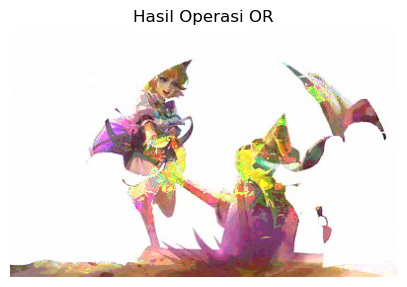

In [58]:
# Operasi OR bitwise
img_or = cv2.bitwise_or(img1, img2_resized)

# Mengubah dari BGR ke RGB agar bisa ditampilkan dengan benar menggunakan matplotlib
img_or_rgb = cv2.cvtColor(img_or, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(5,5))
plt.imshow(img_or_rgb)
plt.title('Hasil Operasi OR'), plt.axis('off')
plt.show()


**Operasi NOT**

Operasi NOT adalah operasi negasi di mana setiap piksel pada citra diubah menjadi kebalikannya. Pada operasi bitwise NOT, setiap bit pada piksel ditukar: bit 0 menjadi 1, dan bit 1 menjadi 0.

Rumus:

$C(x,y)=¬A(x,y)$
$C(x,y)=¬A(x,y)$

Di mana:

`A(x,y)A(x,y) adalah nilai piksel pada citra input.`

`C(x,y)C(x,y) adalah citra hasil.`

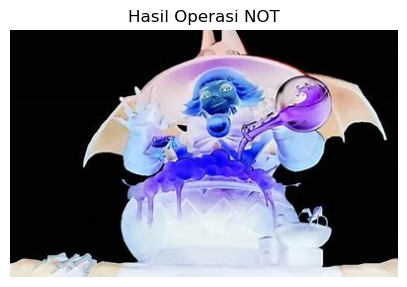

In [62]:
# Operasi NOT bitwise
img_not = cv2.bitwise_not(img1)

# Mengubah dari BGR ke RGB agar bisa ditampilkan dengan benar menggunakan matplotlib
img_not_rgb = cv2.cvtColor(img_not, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(5,5))
plt.imshow(img_not_rgb)
plt.title('Hasil Operasi NOT'), plt.axis('off')
plt.show()


**Operasi XOR**

Operasi XOR menghasilkan piksel 1 jika kedua piksel input berbeda, yaitu satu bernilai 1 dan satu bernilai 0. Jika kedua piksel input sama, hasilnya 0. Operasi ini sering digunakan untuk mendeteksi perbedaan antara dua citra.

Rumus:

$C(x,y)=A(x,y)⊕B(x,y)$
$C(x,y)=A(x,y)⊕B(x,y)$

Di mana:

`A(x,y)A(x,y) adalah nilai piksel pada citra pertama.`

`B(x,y)B(x,y) adalah nilai piksel pada citra kedua.`

`C(x,y)C(x,y) adalah citra hasil.`

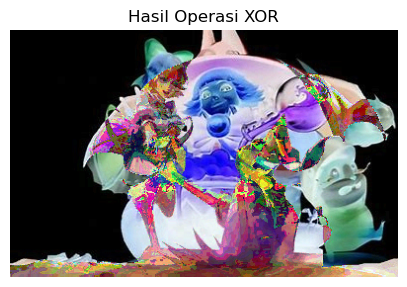

In [67]:
# Operasi XOR bitwise
img_xor = cv2.bitwise_xor(img1, img2_resized)

# Mengubah dari BGR ke RGB agar bisa ditampilkan dengan benar menggunakan matplotlib
img_xor_rgb = cv2.cvtColor(img_xor, cv2.COLOR_BGR2RGB)

# Menampilkan hasil operasi
plt.figure(figsize=(5,5))
plt.imshow(img_xor_rgb)
plt.title('Hasil Operasi XOR'), plt.axis('off')
plt.show()
